In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,LSTM
from sklearn.model_selection import train_test_split
from datetime import date, timedelta,datetime
import matplotlib.pyplot as plt
import yfinance as yf

In [72]:
current_date = datetime.now()
c_date = current_date.date()

In [73]:
data = yf.download("TCS.NS", start='1996-01-01', end=c_date,interval='1d',actions=False)

[*********************100%***********************]  1 of 1 completed


In [74]:
data.count()

Open         5509
High         5509
Low          5509
Close        5509
Adj Close    5509
Volume       5509
dtype: int64

In [75]:
data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-08-12,38.724998,40.000000,38.724998,39.700001,29.462488,212976
2002-08-13,39.750000,40.387501,38.875000,39.162498,29.063591,153576
2002-08-14,39.250000,39.250000,35.724998,36.462502,27.059856,822776
2002-08-15,36.462502,36.462502,36.462502,36.462502,27.059856,0
2002-08-16,36.275002,38.000000,35.750000,36.375000,26.994913,811856


In [76]:
df = data[['Close']]

In [77]:
df.head()

,Close
Date,
2002-08-12,39.700001
2002-08-13,39.162498
2002-08-14,36.462502
2002-08-15,36.462502
2002-08-16,36.375000


In [78]:
df.shape

(5509, 1)

In [79]:
type(df)

pandas.core.frame.DataFrame

In [80]:
mm = MinMaxScaler(feature_range=(0, 1))
df = mm.fit_transform(df)


In [81]:
df

array([[9.35091885e-04],
       [8.16130049e-04],
       [2.18557536e-04],
       ...,
       [9.01566416e-01],
       [9.04675967e-01],
       [8.95114861e-01]])

In [82]:
type(df)

numpy.ndarray

In [83]:
 len_train = int(len(df)*0.8)
 len_test = len(df) - len_train

In [84]:
x_train = df[:len_train]
x_test = df[len_train:]

In [85]:
xnew_train =[]
ynew_train=[]

for i in range(60,len(x_train)):
    z=[]
    for j in range(i-60,i):
        z.append(x_train[j])
    xnew_train.append(z)
    ynew_train.append(x_train[i])

In [86]:
xnew_test =[]
ynew_test=[]
for i in range(60,len(x_test)):
    z=[]
    for j in range(i-60,i):
        z.append(x_test[j])
    xnew_test.append(z)
    ynew_test.append(x_test[i])

In [87]:
xnew_train = np.array(xnew_train)
ynew_train = np.array(ynew_train)
xnew_test = np.array(xnew_test)
ynew_test = np.array(ynew_test)

In [88]:
model = Sequential()

model.add(LSTM(60, return_sequences =True, input_shape=(xnew_train.shape[1],1)))
# model.add(Dropout(0.2))
model.add(LSTM(120, return_sequences =True))
# model.add(Dropout(0.2))
model.add(SimpleRNN(80))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\yjyas\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [89]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [90]:
model.fit(xnew_train,ynew_train,epochs=5)

Epoch 1/5
136/136 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.0049
Epoch 2/5
136/136 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 9.3281e-05
Epoch 3/5
136/136 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - loss: 8.2475e-05
Epoch 4/5
136/136 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - loss: 8.2310e-05
Epoch 5/5
136/136 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - loss: 8.5956e-05


In [24]:
xnew_train.shape

(4347, 60, 1)

In [25]:
ynew_train.shape

(4347, 1)

In [91]:
pred = model.predict([xnew_test])

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step


In [93]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(ynew_test, pred))


In [94]:
print(rmse)

0.023227131186346374


In [95]:
pred1 = np.array(pred)
ynew_test1 = np.array(ynew_test)

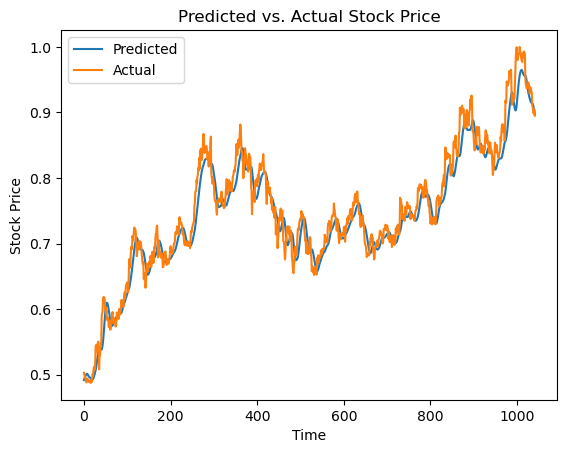

In [96]:
import matplotlib.pyplot as plt

plt.plot(pred1.flatten(), label='Predicted')  # Plot pred as a line
plt.plot(ynew_test1.flatten(), label='Actual') # Plot ynew_test as a line

plt.xlabel('Time')  # Assuming your x-axis represents time
plt.ylabel('Stock Price') # Assuming your data is about stock prices
plt.title('Predicted vs. Actual Stock Price')
plt.legend()  # Show the legend
plt.show()

In [97]:
m = mm.inverse_transform(pred)
n = mm.inverse_transform(ynew_test)

In [98]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(m, n))
print(rmse)

104.94661618080072


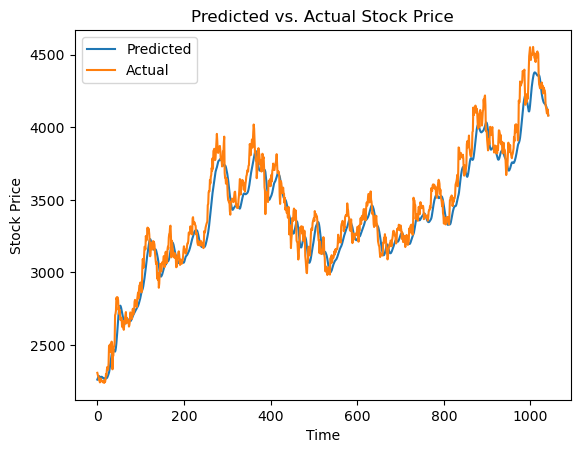

In [25]:
plt.plot(m.flatten(), label='Predicted')  # Plot pred as a line
plt.plot(n.flatten(), label='Actual') # Plot ynew_test as a line

plt.xlabel('Time')  # Assuming your x-axis represents time
plt.ylabel('Stock Price') # Assuming your data is about stock prices
plt.title('Predicted vs. Actual Stock Price')
plt.legend()  # Show the legend
plt.show()

In [48]:
# current_date = datetime.now()
# c_date = current_date.date()

c_date = date(2024,10,18)

In [49]:
date_90_days_back = c_date - timedelta(days=90)
d_90 = date_90_days_back

In [50]:
print(c_date, d_90,sep="--------------")

2024-10-18--------------2024-07-20


In [51]:
newdata = yf.download("TCS.NS", start=d_90, end=c_date,interval='1d',actions=False)

[*********************100%***********************]  1 of 1 completed


In [52]:
newdata.count()

Open         62
High         62
Low          62
Close        62
Adj Close    62
Volume       62
dtype: int64

In [53]:
ndf = newdata[['Close']]

In [57]:
ndf = mm.transform(ndf)

In [58]:
type(ndf)

numpy.ndarray

In [59]:
ndf

array([[0.94103947],
       [0.94435932],
       [0.94522246],
       [0.94881896],
       [0.96328247],
       [0.96178854],
       [0.95830269],
       [0.96272916],
       [0.96532971],
       [0.94008771],
       [0.91175832],
       [0.91533278],
       [0.92180648],
       [0.91563148],
       [0.92806989],
       [0.92074407],
       [0.92103185],
       [0.9427879 ],
       [0.96952372],
       [0.98589063],
       [0.99326066],
       [0.99950202],
       [0.98854651],
       [0.98011407],
       [0.98864615],
       [0.98747307],
       [0.98944283],
       [0.99071544],
       [1.        ],
       [0.99276268],
       [0.99083723],
       [0.98351141],
       [0.98278108],
       [0.97853163],
       [0.97693806],
       [0.98984128],
       [0.98353356],
       [0.99202133],
       [0.9931058 ],
       [0.9910364 ],
       [0.98935432],
       [0.95405324],
       [0.94298707],
       [0.94049718],
       [0.9368675 ],
       [0.93748716],
       [0.93825077],
       [0.942

In [60]:
ndf.shape

(62, 1)

In [66]:
f_date = date(2024,10,21)

In [67]:
iter = f_date-c_date
iter = iter.days

In [68]:
for i in range(iter):
    newarr = ndf[-60:]
    newarr = np.array(newarr)
    newarr = newarr.reshape(1, 60, 1)
    pred1 = model.predict(newarr)
    ndf = np.append(ndf, pred1)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [69]:
print(pred1)

[[0.8760315]]


In [70]:
print(mm.inverse_transform(pred1))

[[3993.6262]]


In [71]:
model.input_shape

(None, 60, 1)

In [34]:
model.save('packet.keras')
